# Telco Customer Churn Analysis (Enhanced EDA)

이 노트북은 텔코 고객 이탈(Churn) 데이터를 더 깊이 있게 분석하고, 변수 간의 상관관계를 명확하게 시각화하기 위해 작성되었습니다.
데이터의 분포와 각 카테고리별 이탈률을 직관적으로 보여줍니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정
sns.set(style="whitegrid", palette="muted")
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정 (Windows)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

## 1. 데이터 로드 및 전처리
기본적인 전처리만 수행하고, 원본 데이터의 특성을 살립니다.

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# TotalCharges 숫자 변환 및 결측치 처리
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# CustomerID 삭제
df.drop('customerID', axis=1, inplace=True)

# Churn을 숫자로 변환 (Yes=1, No=0)
df['Churn_Numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Numeric
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


## 2. 심층 탐색적 데이터 분석 (EDA)

### 타겟 변수 (Churn) 분포

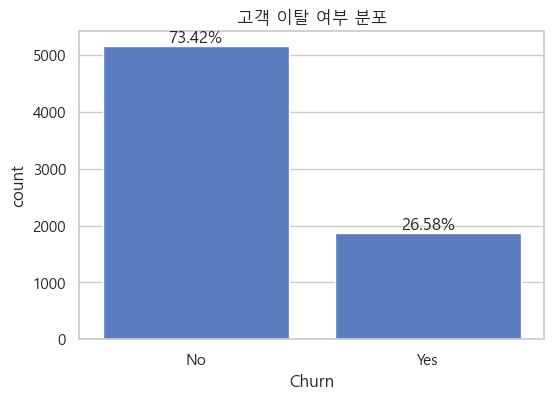

In [3]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df)
plt.title('고객 이탈 여부 분포')

# 비율 표시
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 50,
            '{:1.2f}%'.format(height / total * 100),
            ha="center") 
plt.show()

### 수치형 변수와 이탈의 관계 (KDE Plot)
KDE(Kernel Density Estimate) 그래프를 통해 이탈 고객과 잔존 고객의 데이터 분포가 어떻게 겹치고 다른지 봅니다.

C:\Users\zxcv5\AppData\Local\Temp\ipykernel_7932\4064936892.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'No'][feature], label='Churn: No', shade=True, color='blue')
C:\Users\zxcv5\AppData\Local\Temp\ipykernel_7932\4064936892.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'Yes'][feature], label='Churn: Yes', shade=True, color='red')


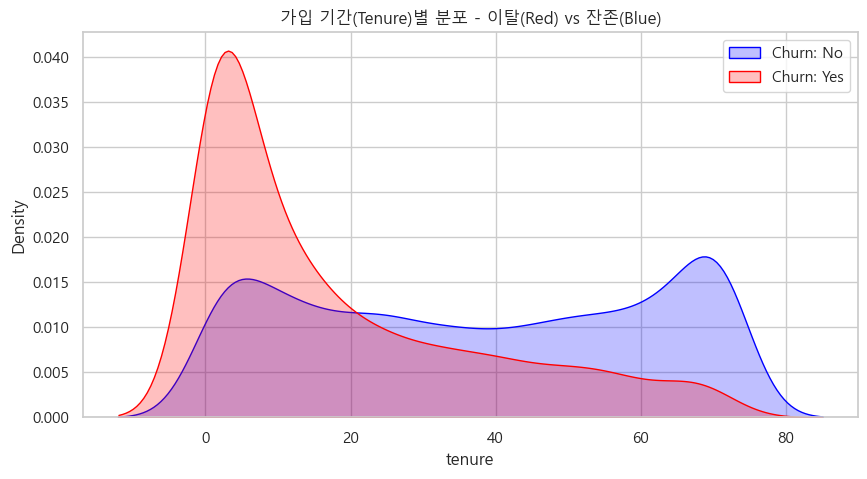

C:\Users\zxcv5\AppData\Local\Temp\ipykernel_7932\4064936892.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'No'][feature], label='Churn: No', shade=True, color='blue')
C:\Users\zxcv5\AppData\Local\Temp\ipykernel_7932\4064936892.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'Yes'][feature], label='Churn: Yes', shade=True, color='red')


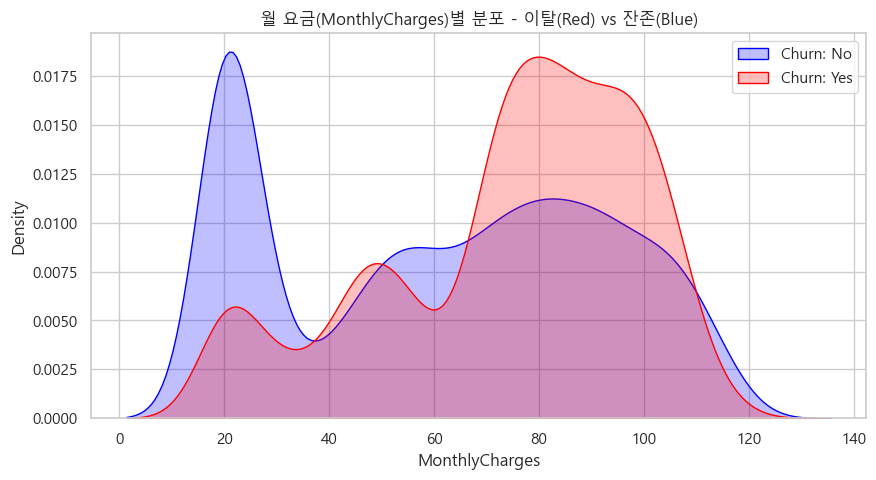

In [4]:
def plot_kde(feature, title):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[df['Churn'] == 'No'][feature], label='Churn: No', shade=True, color='blue')
    sns.kdeplot(df[df['Churn'] == 'Yes'][feature], label='Churn: Yes', shade=True, color='red')
    plt.title(title)
    plt.legend()
    plt.show()

plot_kde('tenure', '가입 기간(Tenure)별 분포 - 이탈(Red) vs 잔존(Blue)')
plot_kde('MonthlyCharges', '월 요금(MonthlyCharges)별 분포 - 이탈(Red) vs 잔존(Blue)')

**인사이트**:
- `tenure`: 가입 기간이 짧을수록(그래프 왼쪽) 붉은색(이탈) 분포가 높습니다. 즉, **신규 가입자의 이탈률이 매우 높습니다**.
- `MonthlyCharges`: 월 요금이 높을수록(그래프 오른쪽) 붉은색(이탈) 분포가 올라갑니다. **고액 요금제 사용자의 이탈이 더 잦음**을 알 수 있습니다.

### 범주형 변수와 이탈률 (Stacked Bar Chart)
각 카테고리 내에서 이탈 비율이 얼마나 되는지 100% 스택 바 차트로 확인하면 더 명확합니다.

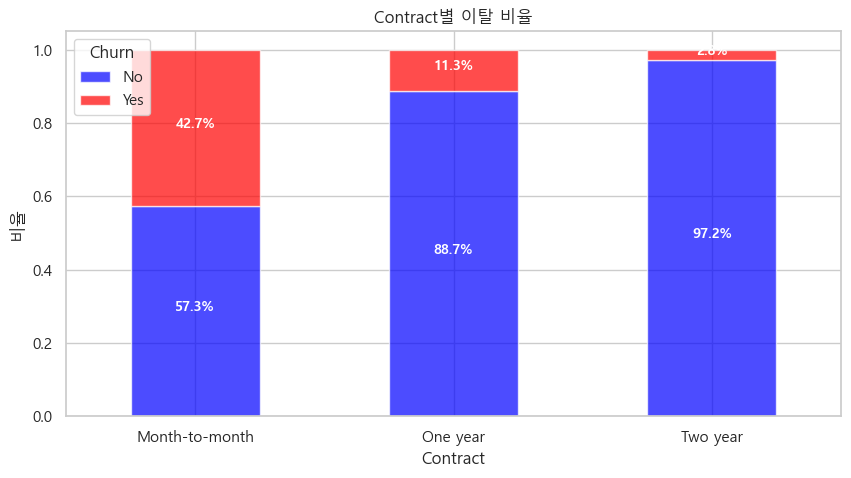

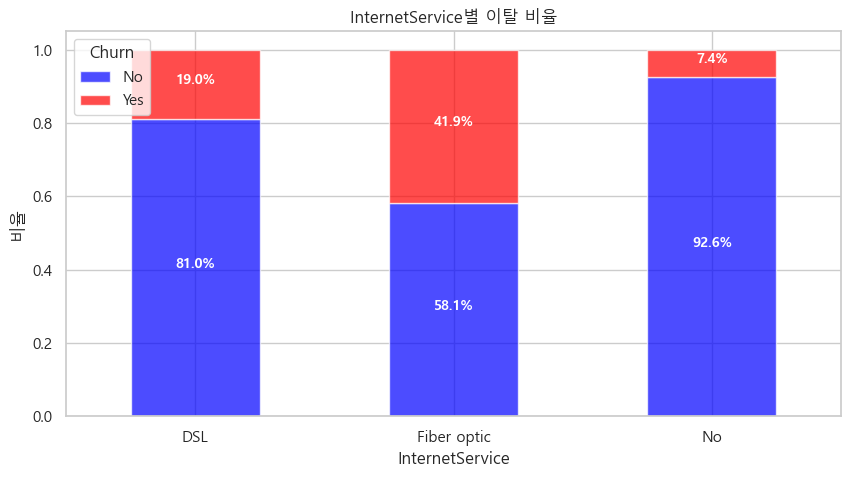

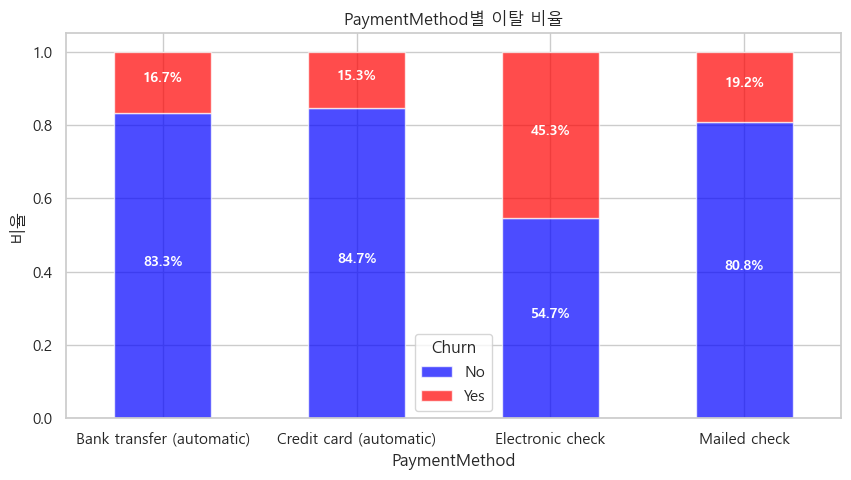

In [5]:
def plot_churn_rate(feature):
    # 교차표 생성
    ct = pd.crosstab(df[feature], df['Churn'], normalize='index')
    
    # 그래프 그리기
    ct.plot(kind='bar', stacked=True, figsize=(10, 5), color=['blue', 'red'], alpha=0.7)
    plt.title(f'{feature}별 이탈 비율')
    plt.ylabel('비율')
    plt.xticks(rotation=0)
    
    # 비율 텍스트 추가
    for n, x in enumerate([*ct.index.values]):
        for (proportion, y_loc) in zip(ct.loc[x], ct.loc[x].cumsum()):                
            plt.text(x=n, y=(y_loc - proportion) + (proportion / 2),
                     s=f'{proportion*100:.1f}%', 
                     color="white",
                     fontsize=10,
                     fontweight="bold", ha='center')

    plt.show()

plot_churn_rate('Contract')
plot_churn_rate('InternetService')
plot_churn_rate('PaymentMethod')

**인사이트**:
- `Contract`: Month-to-month 계약자의 이탈률이 압도적으로 높습니다.
- `InternetService`: Fiber optic 서비스 이용자의 이탈률이 높습니다.
- `PaymentMethod`: Electronic check 사용자의 이탈률이 가장 높습니다.

## 3. 상관관계 분석 (Heatmap)
범주형 데이터를 Label Encoding하여 간단하게 변환한 후, 전체 변수 간의 상관관계를 봅니다.

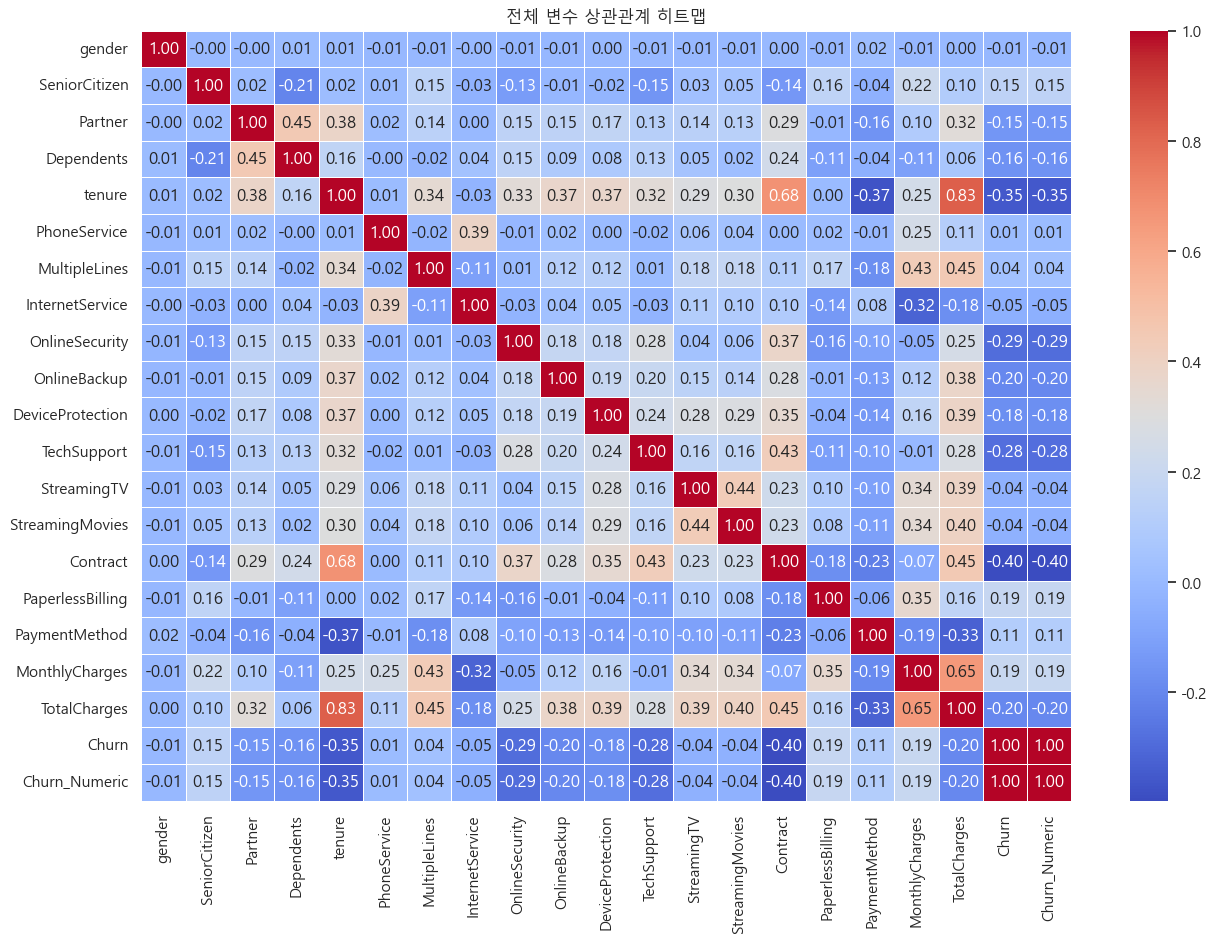

In [6]:
from sklearn.preprocessing import LabelEncoder

# 데이터 복사
df_corr = df.copy()

# 범주형 변수 Label Encoding (Yes/No -> 1/0, A/B/C -> 0/1/2)
le = LabelEncoder()
for col in df_corr.columns:
    if df_corr[col].dtype == 'object':
        df_corr[col] = le.fit_transform(df_corr[col])

# 상관관계 행렬 계산
corr_matrix = df_corr.corr()

# 히트맵 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('전체 변수 상관관계 히트맵')
plt.show()

### 이탈(Churn)과 상관관계가 높은 변수 확인
상관관계 행렬에서 Churn 열만 따로 떼어내어 봅니다.

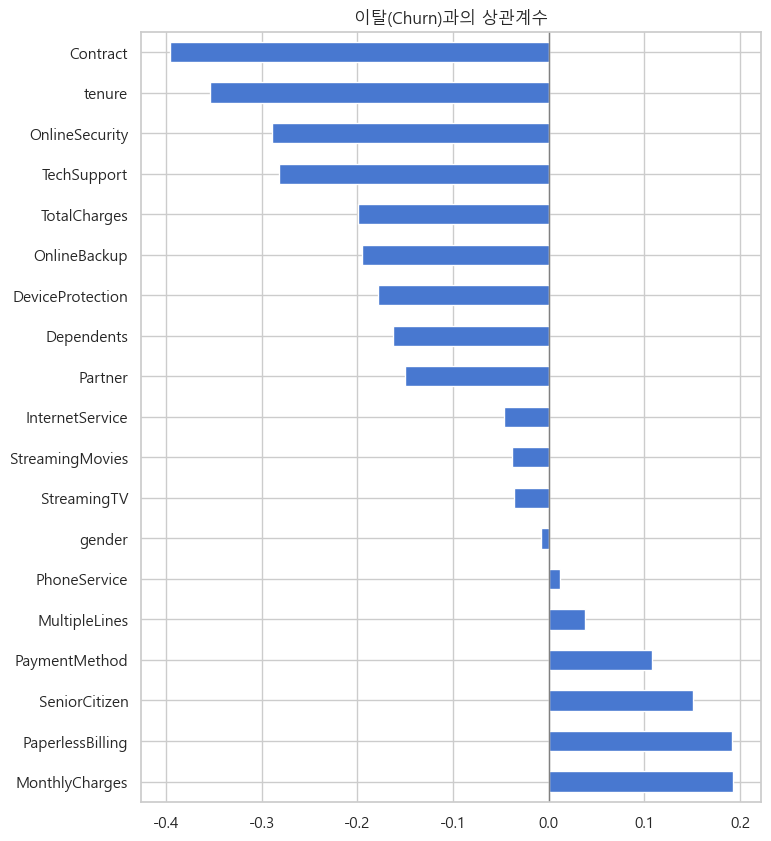

In [7]:
churn_corr = corr_matrix['Churn_Numeric'].sort_values(ascending=False)

plt.figure(figsize=(8, 10))
churn_corr.drop(['Churn', 'Churn_Numeric']).plot(kind='barh')
plt.title('이탈(Churn)과의 상관계수')
plt.axvline(x=0, color='grey', lw=1)
plt.show()